<h3> Importing the libraries</h3>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import tight_layout
import random
import pandas as pd

from tensorflow.keras.preprocessing.image import load_img, img_to_array
#import cv2
np.random.seed(42)                          # This allows us to reproduce the results from our script
from keras.optimizers import Adam, SGD
from keras.utils import np_utils        
from keras.preprocessing import image

import pickle

In [2]:
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


<h3>Importing and Preprocessing the data using ImageDataGenerator</h3> 

In [3]:
img_width = 64
img_height = 64 

In [4]:
# Using ImageDataGenerator to perform real-time data preprocessing like scaling the images etc. as they are passed to the training and testing set - helps save overhead memory

img_data_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)

In [26]:
# Creating a training set with 80% of the data

train_data = img_data_gen.flow_from_directory(directory = 'D:/F drive/YASH study/iqGateway/cell_images', target_size = (img_width, img_height), class_mode = 'binary', batch_size = 32, subset = 'training')
print(type(train_data))
print(train_data.labels)
print("Number of batches in the train set: ", len(train_data))

Found 22048 images belonging to 2 classes.
<class 'tensorflow.python.keras.preprocessing.image.DirectoryIterator'>
[0 0 0 ... 1 1 1]
Number of batches in the train set:  689


In [27]:
# Creating a test set with 20% of the data

test_data = img_data_gen.flow_from_directory(directory = 'D:/F drive/YASH study/iqGateway/cell_images', target_size = (img_width, img_height), class_mode = 'binary', batch_size = 16, subset = 'validation')
print(type(test_data))
print(train_data.labels)
print("Number of batches in the test set: ", len(test_data))

Found 5510 images belonging to 2 classes.
<class 'tensorflow.python.keras.preprocessing.image.DirectoryIterator'>
[0 0 0 ... 1 1 1]
Number of batches in the test set:  345


### Data Visualization

(16, 64, 64, 3)
Number of batches:  1378
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


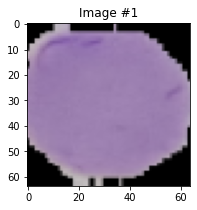

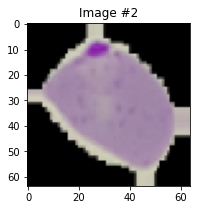

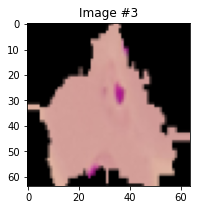

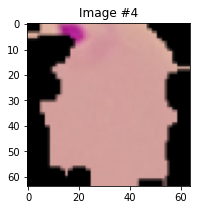

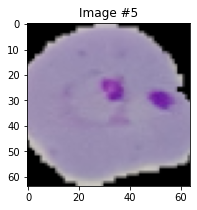

In [7]:
# Displaying 5 images from the training set

batch= next(train_data)
print(batch[0].shape)         # batch[0] is the images, batch[1] are the labels
print("Number of batches: ", len(train_data))

for i in range(0,5):
    img_number = random.randint(0,15)    # since 16 images in each batch
    img = batch[0][img_number]
    print (img.shape)
    fig = plt.figure()
    fig.set_figheight(3)
    fig.set_figwidth(3)
    plt.title('Image #'+str(i+1))
    plt.imshow(img)
    plt.tight_layout(pad=1.0)
    i =+ 1
    
plt.show()    
    

(16, 64, 64, 3)
Number of batches:  345
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


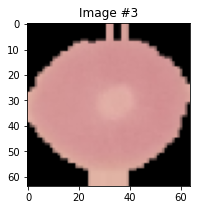

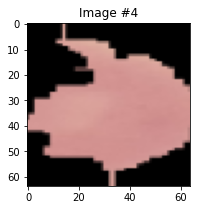

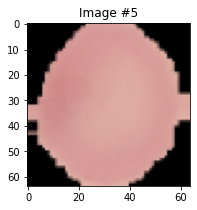

In [8]:
# Displaying 5 images from the test set

batch= next(test_data)
print(batch[0].shape)         # batch[0] is the images, batch[1] are the labels
print("Number of batches: ", len(test_data))

for i in range(0,5):
    img_number = random.randint(0,15)    # since 16 images in each batch
    img = batch[0][img_number]
    print (img.shape)
    fig = plt.figure()
    fig.set_figheight(3)
    fig.set_figwidth(3)
    plt.title('Image #'+str(i+1))
    plt.imshow(img)
    plt.tight_layout(pad=1.0)
    i =+ 1
    
plt.show()    

We can notice that the cells with some purple/pink spots are the infected cells

#### Creating a dataframe for model comparision

In [15]:
#Creating Dataframe for Comparison

Model_Table = pd.DataFrame(columns = ("Model", "Total  No. of Parameters" ,"Optimizer", "Loss Function", "Training Accuracy", "Validation Accuracy"))

<h3> Model 1 - CNN with two convolution Layers and optimizer 'adam' </h3>

In [10]:
model = Sequential()

# Adding the first layer of CNN

# 16 filters of (3,3) filter size
# 3 in 'input_shape' parameter indicates colour image
# Activation function used is 'relu'

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation = 'relu'))       
model.add(MaxPool2D(2,2))    # dimensionality reduction
model.add(Dropout(0.2))      # dropping 20% neurons are random


# Adding the second layer of CNN

# 32 filters on (3,3) size

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))



# Converting multi-dimensional to a vector - flattening

model.add(Flatten())

# Fully connected layer with 64 units of neurons

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))    # Dropping 50% neurons randomly


# Output layer 
model.add(Dense(1, activation = 'sigmoid'))    # 'Sigmoid' activation function since binary classification    

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

<h3> Model Compilation and training</h3>

In [11]:
# Compilation using 'adam' optimizer,  'binary_crossentropy' loss function

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
# Training the model

history = model.fit_generator(generator = train_data, steps_per_epoch = len(train_data), epochs = 5, validation_data = test_data, validation_steps = len(test_data))

C:\Users\yashr\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1378/1378 [==============================] - 430s 311ms/step - loss: 0.6650 - accuracy: 0.5883 - val_loss: 0.2467 - val_accuracy: 0.9214
Epoch 2/5
1378/1378 [==============================] - 128s 93ms/step - loss: 0.2827 - accuracy: 0.8964 - val_loss: 0.2189 - val_accuracy: 0.9289
Epoch 3/5
1378/1378 [==============================] - 131s 95ms/step - loss: 0.2477 - accuracy: 0.9142 - val_loss: 0.2130 - val_accuracy: 0.9270
Epoch 4/5
1378/1378 [==============================] - 131s 95ms/step - loss: 0.2204 - accuracy: 0.9261 - val_loss: 0.2080 - val_accuracy: 0.9298
Epoch 5/5
1378/1378 [==============================] - 136s 99ms/step - loss: 0.2178 - accuracy: 0.9287 - val_loss: 0.1861 - val_accuracy: 0.9414


In [17]:
# Storing the results in a dataframe

Model_Table.loc[len(Model_Table.index)] = ['CNN', model.count_params(), 'adam', 'binary_crossentropy', history.history['accuracy'][-1], history.history['val_accuracy'][-1]]

### Visualizing the Model Accuracy and Model Loss

In [18]:
# Learning Curve
history.history

{'loss': [0.5850289463996887,
  0.27129510045051575,
  0.24061962962150574,
  0.2202175408601761,
  0.20904818177223206],
 'accuracy': [0.676886796951294,
  0.9021226167678833,
  0.9183145761489868,
  0.929018497467041,
  0.9348240494728088],
 'val_loss': [0.2466811090707779,
  0.21892687678337097,
  0.21300572156906128,
  0.20804163813591003,
  0.18608467280864716],
 'val_accuracy': [0.9214156270027161,
  0.928856611251831,
  0.92704176902771,
  0.9297640919685364,
  0.9413793087005615]}

In [19]:
def learning_curve_plot(history, epoch):
    
    # Plot of accuracy for training and validation
    epoch_range = range(1, epoch + 1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy: ")
    plt.xlabel("Epoch: ")
    plt.legend(['Train', 'val'], loc = 'upper left')
    plt.show()
    
    # Plot of Loss values for training and validation
    epoch_range = range(1, epoch + 1)
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title("Model Loss")
    plt.ylabel("Loss: ")
    plt.xlabel("Epoch: ")
    plt.legend(['Train', 'val'], loc = 'upper left')
    plt.show()

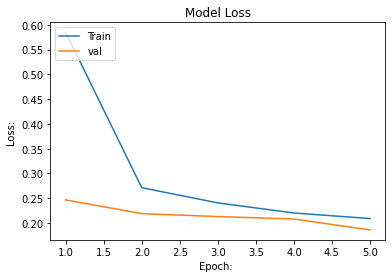

In [20]:
learning_curve_plot(history, 5)

From the above graphs, there is a hint of overfitting as Model accuracy seems to have saturated and is not increasing much at different epochs. It would be wise to alter the 'steps per epoch', 'batch size' and 'number of epochs'.

### Model 1: CNN with two convolution Layers - SGD optimizer

In [21]:
# Using 'SGD' optimizer,  'binary_crossentropy' loss function

model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
# Training the model

history = model.fit_generator(generator = train_data, steps_per_epoch = len(train_data), epochs = 5, validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
1378/1378 [==============================] - 135s 97ms/step - loss: 0.4643 - accuracy: 0.7305 - val_loss: 0.4308 - val_accuracy: 0.9220
Epoch 2/5
1378/1378 [==============================] - 126s 91ms/step - loss: 0.2429 - accuracy: 0.9269 - val_loss: 0.1838 - val_accuracy: 0.9392
Epoch 3/5
1378/1378 [==============================] - 139s 101ms/step - loss: 0.2200 - accuracy: 0.9333 - val_loss: 0.1886 - val_accuracy: 0.9332
Epoch 4/5
1378/1378 [==============================] - 126s 91ms/step - loss: 0.1952 - accuracy: 0.9431 - val_loss: 0.1846 - val_accuracy: 0.9336
Epoch 5/5
1378/1378 [==============================] - 126s 91ms/step - loss: 0.1956 - accuracy: 0.9408 - val_loss: 0.1822 - val_accuracy: 0.9388


In [23]:
# Storing the results in a DataFrame

Model_Table.loc[len(Model_Table.index)] = ['CNN', model.count_params(), 'SGD', 'binary_crossentropy', history.history['accuracy'][-1], history.history['val_accuracy'][-1]]

In [25]:
learning_curve_plot(history, 5)

From the above graphs, there is a hint of overfitting as Model accuracy seems to have saturated and is not increasing much at different epochs. It would be wise to alter the 'steps per epoch', 'batch size' and 'number of epochs'.

### Model 1: CNN with two convolution Layers - 'adam' optimizer, different steps_per_epoch

In [29]:
# Compilation using 'adam' optimizer,  'binary_crossentropy' loss function

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
# Training the model

history = model.fit_generator(generator = train_data, steps_per_epoch = len(train_data)//32, epochs = 30, validation_data = test_data, validation_steps = len(test_data)//32)

Epoch 1/30
21/21 [==============================] - 4s 188ms/step - loss: 0.1944 - accuracy: 0.9479 - val_loss: 0.1967 - val_accuracy: 0.9375
Epoch 2/30
21/21 [==============================] - 5s 229ms/step - loss: 0.1743 - accuracy: 0.9509 - val_loss: 0.1683 - val_accuracy: 0.9250
Epoch 3/30
21/21 [==============================] - 5s 220ms/step - loss: 0.1970 - accuracy: 0.9464 - val_loss: 0.2429 - val_accuracy: 0.9250
Epoch 4/30
21/21 [==============================] - 4s 190ms/step - loss: 0.2496 - accuracy: 0.9196 - val_loss: 0.1846 - val_accuracy: 0.9187
Epoch 5/30
21/21 [==============================] - 4s 205ms/step - loss: 0.1888 - accuracy: 0.9479 - val_loss: 0.2348 - val_accuracy: 0.9000
Epoch 6/30
21/21 [==============================] - 5s 221ms/step - loss: 0.2165 - accuracy: 0.9435 - val_loss: 0.1562 - val_accuracy: 0.9312
Epoch 7/30
21/21 [==============================] - 5s 217ms/step - loss: 0.1813 - accuracy: 0.9420 - val_loss: 0.2442 - val_accuracy: 0.9187
Epoch 

In [29]:
# Storing the results in a DataFrame

Model_Table.loc[len(Model_Table.index)] = ['CNN - diff steps/Epoch', model.count_params(), 'adam', 'binary_crossentropy', history.history['accuracy'][-1], history.history['val_accuracy'][-1]]

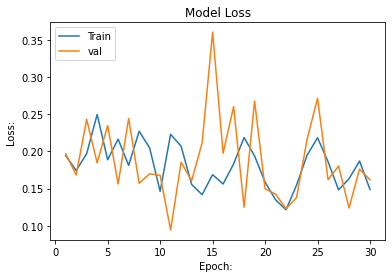

In [31]:
learning_curve_plot(history, 30)

In [32]:
Model_Table

Model Total  No. of Parameters Optimizer  \
0                     CNN                   406625      adam   
1                     CNN                   406625       SGD   
2  CNN - diff steps/Epoch                   406625      adam   

         Loss Function  Training Accuracy  Validation Accuracy  
0  binary_crossentropy           0.934824             0.941379  
1  binary_crossentropy           0.938316             0.938838  
2  binary_crossentropy           0.961310             0.943750

The CNN model with <b>batch_size = 32, epochs = 30 and steps_per_epoch = len(train_data)//batch_size</b> deals with the problem of overfitting and also provides marginally better accuracy.

### Model 1: CNN with two convolution Layers - Adagrad optimizer

In [34]:
# Compilation using 'adagrad' optimizer,  'binary_crossentropy' loss function

model.compile(optimizer = 'adagrad', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
# Training the model

history = model.fit_generator(generator = train_data, steps_per_epoch = len(train_data)//32, epochs = 30, validation_data = test_data, validation_steps = len(test_data)//32)

C:\Users\yashr\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
21/21 [==============================] - 4s 206ms/step - loss: 0.1742 - accuracy: 0.9449 - val_loss: 0.1291 - val_accuracy: 0.9438
Epoch 2/30
21/21 [==============================] - 4s 178ms/step - loss: 0.2179 - accuracy: 0.9464 - val_loss: 0.1041 - val_accuracy: 0.9625
Epoch 3/30
21/21 [==============================] - 4s 198ms/step - loss: 0.2182 - accuracy: 0.9375 - val_loss: 0.1453 - val_accuracy: 0.9500
Epoch 4/30
21/21 [==============================] - 4s 206ms/step - loss: 0.1809 - accuracy: 0.9554 - val_loss: 0.1469 - val_accuracy: 0.9312
Epoch 5/30
21/21 [==============================] - 4s 198ms/step - loss: 0.1907 - accuracy: 0.9420 - val_loss: 0.2046 - val_accuracy: 0.9438
Epoch 6/30
21/21 [==============================] - 4s 180ms/step - loss: 0.1686 - accuracy: 0.9494 - val_loss: 0.1315 - val_accuracy: 0.9438
Epoch 7/30
21/21 [==============================] - 4s 186ms/step - loss: 0.1785 - accuracy: 0.9554 - val_loss: 0.1568 - val_accuracy: 0.9187
Epoch 

In [34]:
# Plotting the learning curve

learning_curve_plot(history, 30)

In [36]:
# Storing the results in a DataFrame

Model_Table.loc[len(Model_Table.index)] = ['CNN', model.count_params(), 'adagrad', 'binary_crossentropy', history.history['accuracy'][-1], history.history['val_accuracy'][-1]]

### Model 1: CNN with two convolution Layers - Adamax optimizer

In [37]:
# Compilation using 'adamax' optimizer,  'binary_crossentropy' loss function

model.compile(optimizer = 'adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [38]:
# Training the model

history = model.fit_generator(generator = train_data, steps_per_epoch = len(train_data)//32, epochs = 30, validation_data = test_data, validation_steps = len(test_data)//32)

Epoch 1/30
21/21 [==============================] - 5s 199ms/step - loss: 0.1889 - accuracy: 0.9433 - val_loss: 0.1889 - val_accuracy: 0.9563
Epoch 2/30
21/21 [==============================] - 5s 216ms/step - loss: 0.1881 - accuracy: 0.9382 - val_loss: 0.3229 - val_accuracy: 0.9000
Epoch 3/30
21/21 [==============================] - 4s 200ms/step - loss: 0.1472 - accuracy: 0.9553 - val_loss: 0.1621 - val_accuracy: 0.9312
Epoch 4/30
21/21 [==============================] - 4s 211ms/step - loss: 0.1600 - accuracy: 0.9509 - val_loss: 0.2593 - val_accuracy: 0.8687
Epoch 5/30
21/21 [==============================] - 3s 162ms/step - loss: 0.1910 - accuracy: 0.9462 - val_loss: 0.1508 - val_accuracy: 0.9312
Epoch 6/30
21/21 [==============================] - 4s 196ms/step - loss: 0.1314 - accuracy: 0.9572 - val_loss: 0.1381 - val_accuracy: 0.9438
Epoch 7/30
21/21 [==============================] - 4s 205ms/step - loss: 0.2447 - accuracy: 0.9380 - val_loss: 0.0954 - val_accuracy: 0.9688
Epoch 

In [39]:
# Storing the results in a DataFrame

Model_Table.loc[len(Model_Table.index)] = ['CNN', model.count_params(), 'adagmax', 'binary_crossentropy', history.history['accuracy'][-1], history.history['val_accuracy'][-1]]

### Model 1: CNN with two convolution Layers - Nadam optimizer

In [42]:
# Compilation using 'Nadam' optimizer,  'binary_crossentropy' loss function

model.compile(optimizer = 'nadam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [43]:
# Training the model

history = model.fit_generator(generator = train_data, steps_per_epoch = len(train_data)//32, epochs = 30, validation_data = test_data, validation_steps = len(test_data)//32)

Epoch 1/30
21/21 [==============================] - 6s 193ms/step - loss: 0.1827 - accuracy: 0.9407 - val_loss: 0.1722 - val_accuracy: 0.9312
Epoch 2/30
21/21 [==============================] - 5s 219ms/step - loss: 0.1839 - accuracy: 0.9498 - val_loss: 0.2851 - val_accuracy: 0.9500
Epoch 3/30
21/21 [==============================] - 5s 223ms/step - loss: 0.1986 - accuracy: 0.9424 - val_loss: 0.1422 - val_accuracy: 0.9375
Epoch 4/30
21/21 [==============================] - 5s 223ms/step - loss: 0.2064 - accuracy: 0.9458 - val_loss: 0.1691 - val_accuracy: 0.9312
Epoch 5/30
21/21 [==============================] - 4s 178ms/step - loss: 0.1824 - accuracy: 0.9555 - val_loss: 0.1751 - val_accuracy: 0.9125
Epoch 6/30
21/21 [==============================] - 5s 224ms/step - loss: 0.1818 - accuracy: 0.9362 - val_loss: 0.1525 - val_accuracy: 0.9312
Epoch 7/30
21/21 [==============================] - 5s 224ms/step - loss: 0.1705 - accuracy: 0.9490 - val_loss: 0.1824 - val_accuracy: 0.9438
Epoch 

In [44]:
# Storing the results in a DataFrame

Model_Table.loc[len(Model_Table.index)] = ['CNN', model.count_params(), 'Nadam', 'binary_crossentropy', history.history['accuracy'][-1], history.history['val_accuracy'][-1]]

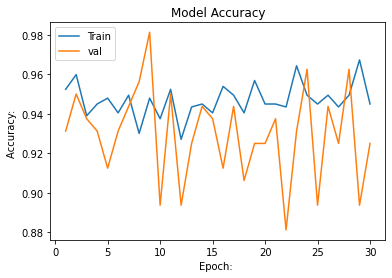

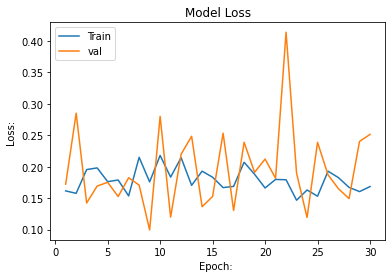

In [45]:
# Plotting the learning curve

learning_curve_plot(history, 30)

### Model 2: CNN with three convolutional Layers and different optimizers

In [46]:
# CNN with 3 layers

model = Sequential()

# Adding the first layer of CNN
# 16 filter of (3,3) filter size
# 3 in 'input_shape' parameter indicated colour image
# Activation function used is 'relu'

model.add(Conv2D(16,(3,3), input_shape = (img_width, img_height, 3), activation = 'relu'))       
model.add(MaxPool2D(2,2))    # Adding max pool of size (2,2)  - technique for dimensionality reduction
model.add(Dropout(0.2))      # Technique to prevent over-fitting

# Adding the second layer of CNN
# 32 filters on (3,3) size
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))


# Adding the third layer of CNN
# 64 filters on (3,3) size
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.1))


# Converting multi-dimensional to a vector - flattening
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))   # Fully connected layer with 64 units of neurons
model.add(Dropout(0.5))    # Dropping 50% neurons randomly - technique to prevent oevrsitting

model.add(Dense(1, activation = 'sigmoid'))    # 'Sigmoid' activation function since binary classification


# Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)       

### Model 2: CNN with three convolutional Layers and SGD

In [47]:
model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [48]:
history = model.fit_generator(generator = train_data, steps_per_epoch = len(train_data)//32, epochs = 30, validation_data = test_data, validation_steps = len(test_data)//32)

Epoch 1/30
21/21 [==============================] - 6s 213ms/step - loss: 0.6999 - accuracy: 0.5056 - val_loss: 0.6915 - val_accuracy: 0.5437
Epoch 2/30
21/21 [==============================] - 4s 189ms/step - loss: 0.7004 - accuracy: 0.4583 - val_loss: 0.6927 - val_accuracy: 0.5312
Epoch 3/30
21/21 [==============================] - 4s 196ms/step - loss: 0.6961 - accuracy: 0.5082 - val_loss: 0.6924 - val_accuracy: 0.5250
Epoch 4/30
21/21 [==============================] - 5s 223ms/step - loss: 0.6901 - accuracy: 0.5411 - val_loss: 0.6936 - val_accuracy: 0.4875
Epoch 5/30
21/21 [==============================] - 4s 192ms/step - loss: 0.6949 - accuracy: 0.4977 - val_loss: 0.6926 - val_accuracy: 0.4938
Epoch 6/30
21/21 [==============================] - 4s 186ms/step - loss: 0.6950 - accuracy: 0.4986 - val_loss: 0.6941 - val_accuracy: 0.4688
Epoch 7/30
21/21 [==============================] - 5s 221ms/step - loss: 0.6919 - accuracy: 0.4929 - val_loss: 0.6955 - val_accuracy: 0.4500
Epoch 

In [50]:
# Storing the results in a DataFrame

Model_Table.loc[len(Model_Table.index)] = ['CNN - three layers', model.count_params(), 'SGD', 'binary_crossentropy', history.history['accuracy'][-1], history.history['val_accuracy'][-1]]

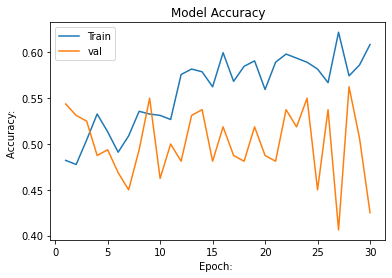

In [51]:
# Plotting the learning curve

learning_curve_plot(history, 30)

### Model 2: CNN with three convolutional Layers and adam

In [52]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [53]:
history = model.fit_generator(generator = train_data, steps_per_epoch = len(train_data)//32, epochs = 30, validation_data = test_data, validation_steps = len(test_data)//32)

Epoch 1/30
21/21 [==============================] - 6s 216ms/step - loss: 0.6911 - accuracy: 0.5641 - val_loss: 0.7083 - val_accuracy: 0.4750
Epoch 2/30
21/21 [==============================] - 5s 217ms/step - loss: 0.6989 - accuracy: 0.5278 - val_loss: 0.6735 - val_accuracy: 0.5437
Epoch 3/30
21/21 [==============================] - 4s 205ms/step - loss: 0.6606 - accuracy: 0.6245 - val_loss: 0.6682 - val_accuracy: 0.5250
Epoch 4/30
21/21 [==============================] - 4s 175ms/step - loss: 0.6544 - accuracy: 0.6314 - val_loss: 0.6260 - val_accuracy: 0.5375
Epoch 5/30
21/21 [==============================] - 4s 207ms/step - loss: 0.6660 - accuracy: 0.5807 - val_loss: 0.6775 - val_accuracy: 0.5125
Epoch 6/30
21/21 [==============================] - 5s 220ms/step - loss: 0.6562 - accuracy: 0.6350 - val_loss: 0.6487 - val_accuracy: 0.5188
Epoch 7/30
21/21 [==============================] - 4s 202ms/step - loss: 0.6469 - accuracy: 0.6579 - val_loss: 0.6226 - val_accuracy: 0.7625
Epoch 

In [54]:
# Storing the results in a DataFrame

Model_Table.loc[len(Model_Table.index)] = ['CNN - 3 layers', model.count_params(), 'adam', 'binary_crossentropy', history.history['accuracy'][-1], history.history['val_accuracy'][-1]]

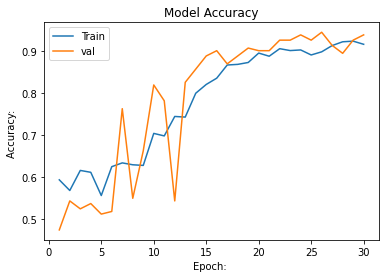

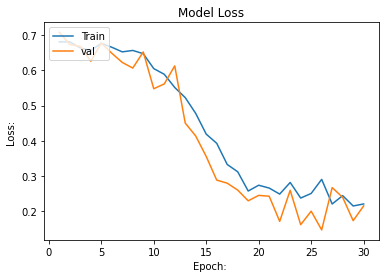

In [55]:
# Plotting the learning curve

learning_curve_plot(history, 30)

In [68]:
Model_Table

Model Total  No. of Parameters Optimizer  \
0                     CNN                   406625      adam   
1                     CNN                   406625       SGD   
2  CNN - diff steps/Epoch                   406625      adam   
3                     CNN                   406625   adagrad   
4                     CNN                   406625   adagrad   
5                     CNN                   406625   adagmax   
6                     CNN                   406625     Nadam   
7      CNN - three layers                   171169       SGD   
8          CNN - 3 layers                   171169      adam   

         Loss Function Training Accuracy Validation Accuracy  
0  binary_crossentropy          0.934824            0.941379  
1  binary_crossentropy          0.938316            0.938838  
2  binary_crossentropy           0.96131             0.94375  
3  binary_crossentropy          0.940476             0.91875  
4  binary_crossentropy          0.940476             0.91875  
5  binary_crossentropy          0.950893             0.90625  
6  binary_crossentropy           0.94494               0.925  
7  binary_crossentropy          0.608631               0.425  
8  binary_crossentropy          0.915179              0.9375

<b> Out of all the models and variations tried: CNN with 2 convolutional layers with 'adam' optimizer with batch size = 32, steps per epoch = len(train_data)//batch_size, epochs = 30, and MaxPooling after each Layer provides the highest Accuracy. </b>

### Model 3: CNN with best optimizer found so far - MaxPooling after the second layer (more parameters)

In [69]:
model = Sequential()

# Adding the first layer of CNN

# 16 filters of (3,3) filter size
# 3 in 'input_shape' parameter indicates colour image
# Activation function used is 'relu'

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation = 'relu'))       
model.add(Dropout(0.2))      # dropping 20% neurons are random


# Adding the second layer of CNN

# 32 filters on (3,3) size
# Max Pooling after the second convolution layer
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))



# Converting multi-dimensional to a vector - flattening

model.add(Flatten())

# Fully connected layer with 64 units of neurons

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))    # Dropping 50% neurons randomly


# Output layer 
model.add(Dense(1, activation = 'sigmoid'))    # 'Sigmoid' activation function since binary classification    

# Summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
dropout_7 (Dropout)          (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [71]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [72]:
history = model.fit_generator(generator = train_data, steps_per_epoch = len(train_data)//32, epochs = 30, validation_data = test_data, validation_steps = len(test_data)//32)

Epoch 1/30
21/21 [==============================] - 6s 265ms/step - loss: 1.2455 - accuracy: 0.4988 - val_loss: 0.6932 - val_accuracy: 0.4875
Epoch 2/30
21/21 [==============================] - 5s 243ms/step - loss: 0.6948 - accuracy: 0.5158 - val_loss: 0.6921 - val_accuracy: 0.5312
Epoch 3/30
21/21 [==============================] - 5s 239ms/step - loss: 0.6954 - accuracy: 0.4979 - val_loss: 0.6926 - val_accuracy: 0.5437
Epoch 4/30
21/21 [==============================] - 5s 227ms/step - loss: 0.6879 - accuracy: 0.5583 - val_loss: 0.6925 - val_accuracy: 0.4812
Epoch 5/30
21/21 [==============================] - 5s 239ms/step - loss: 0.6729 - accuracy: 0.6148 - val_loss: 0.6794 - val_accuracy: 0.5625
Epoch 6/30
21/21 [==============================] - 5s 259ms/step - loss: 0.6641 - accuracy: 0.5994 - val_loss: 0.6958 - val_accuracy: 0.4875
Epoch 7/30
21/21 [==============================] - 5s 225ms/step - loss: 0.6738 - accuracy: 0.5902 - val_loss: 0.6752 - val_accuracy: 0.5500
Epoch 

In [73]:
# Storing the results in a DataFrame

Model_Table.loc[len(Model_Table.index)] = ['CNN -2 layers - different pooling', model.count_params(), 'adam', 'binary_crossentropy', history.history['accuracy'][-1], history.history['val_accuracy'][-1]]

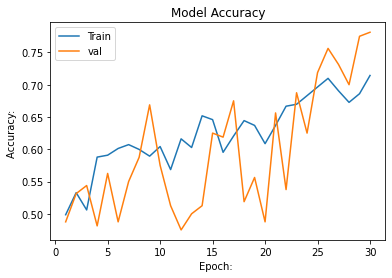

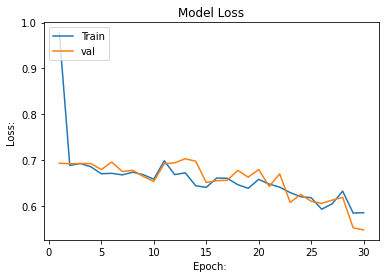

In [74]:
# Plotting the learning curve

learning_curve_plot(history, 30)

MaxPooling after the second convolutional layer does not improve accuracy.

### Model 1: CNN with two convolution Layers - Adam optimizer - different epochs and dropout rate

In [79]:
model = Sequential()

# Adding the first layer of CNN

# 16 filters of (3,3) filter size
# 3 in 'input_shape' parameter indicates colour image
# Activation function used is 'relu'

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation = 'relu'))       
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))      # dropping 20% neurons are random


# Adding the second layer of CNN

# 32 filters on (3,3) size
# Max Pooling after the second convolution layer
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))



# Converting multi-dimensional to a vector - flattening

model.add(Flatten())

# Fully connected layer with 64 units of neurons

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))    # Dropping 50% neurons randomly


# Output layer 
model.add(Dense(1, activation = 'sigmoid'))    # 'Sigmoid' activation function since binary classification    

# Summary of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)             

In [80]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [81]:
history = model.fit_generator(generator = train_data, steps_per_epoch = len(train_data)//32, epochs = 50, validation_data = test_data, validation_steps = len(test_data)//32)

Epoch 1/50
21/21 [==============================] - 5s 174ms/step - loss: 0.7232 - accuracy: 0.5034 - val_loss: 0.6927 - val_accuracy: 0.5312
Epoch 2/50
21/21 [==============================] - 3s 139ms/step - loss: 0.6877 - accuracy: 0.5382 - val_loss: 0.6908 - val_accuracy: 0.5625
Epoch 3/50
21/21 [==============================] - 3s 142ms/step - loss: 0.6811 - accuracy: 0.5949 - val_loss: 0.6831 - val_accuracy: 0.5375
Epoch 4/50
21/21 [==============================] - 3s 168ms/step - loss: 0.6852 - accuracy: 0.5699 - val_loss: 0.6853 - val_accuracy: 0.5188
Epoch 5/50
21/21 [==============================] - 4s 196ms/step - loss: 0.6718 - accuracy: 0.6016 - val_loss: 0.6746 - val_accuracy: 0.6687
Epoch 6/50
21/21 [==============================] - 3s 163ms/step - loss: 0.6722 - accuracy: 0.5742 - val_loss: 0.6955 - val_accuracy: 0.4625
Epoch 7/50
21/21 [==============================] - 4s 214ms/step - loss: 0.6559 - accuracy: 0.6228 - val_loss: 0.6557 - val_accuracy: 0.5437
Epoch 

In [82]:
# Storing the results in a DataFrame

Model_Table.loc[len(Model_Table.index)] = ['CNN - different dropout/epoch', model.count_params(), 'adam', 'binary_crossentropy', history.history['accuracy'][-1], history.history['val_accuracy'][-1]]

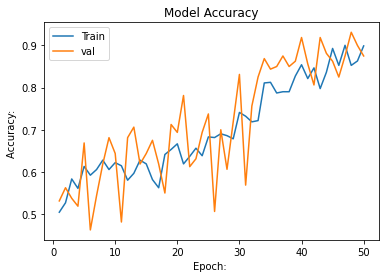

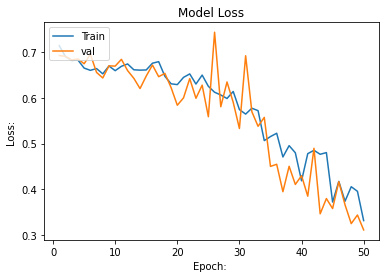

In [84]:
# Plotting the learning curve

learning_curve_plot(history, 50)

Increasing the number of epochs to 50 and varying the dropout rate does not improve the accuracy.

### Saving the best model

In [94]:
# Storing the model
model.save("malaria_classification")

INFO:tensorflow:Assets written to: malaria_classification\assets
